In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import textacy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score

# Splitting
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

# Preprocessing
from sklearn.preprocessing import OneHotEncoder

# Metrics
from sklearn.metrics import accuracy_score

# Models
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm
%matplotlib inline

In [2]:
## Import Data

In [3]:
import ast
# ast.literal_eval
# df = get_undersampled(pd.read_csv("data/train_raw.csv"))
# df2 = get_undersampled(pd.read_csv("data/test_raw.csv"))

df = pd.read_csv("data/train_raw.csv")
df2 = pd.read_csv("data/test_raw.csv")

In [4]:
# len(test_tags)

In [5]:
train_tags =df["transcript"]
test_tags = df2["transcript"]

In [6]:
# train_labels = df
# # labels.head()
# test_labels = df2

In [7]:
# train_tags.tolist()[0].split(" ")

In [8]:
docs = []
train_corp = textacy.Corpus(lang='en')
for l in tqdm(train_tags.tolist()):
    train_corp.add_text(l)
test_corp = textacy.Corpus(lang='en')
for l in tqdm(test_tags.tolist()):
    test_corp.add_text(l)

100%|██████████| 617/617 [03:05<00:00,  2.73it/s]


In [9]:
## Entire corpus
TR_LEN = len(train_corp)
TE_LEN =len(test_corp)      

In [10]:
# entire_corpus = textacy.Corpus(lang='en')
# for l in train_tags.tolist()+test_tags.tolist():
#     entire_corpus.add_text(' '.join(l))

In [11]:
# len(entire_corpus)

In [12]:
# list(test_corp[0].tokens)

## Preprocess Data - Without combining

In [13]:
def tf_idf_corpus(train_c,test_c):
    vectorizer = textacy.Vectorizer(
        tf_type='linear', apply_idf=True, idf_type='smooth', norm='l2',
        min_df=2, max_df=0.95)
    train = vectorizer.fit_transform(
        (doc.to_terms_list(ngrams=1, named_entities=True, as_strings=True)
         for doc in train_c))
    test = vectorizer.transform(
        (doc.to_terms_list(ngrams=1, named_entities=True, as_strings=True)
         for doc in test_c))
    return train,test
X_train,X_test = tf_idf_corpus(train_corp,test_corp)

## vectorize data with combining

In [14]:
# def tf_idf_corpus(corpus):
#     vectorizer = textacy.Vectorizer(
#         tf_type='linear', apply_idf=True, idf_type='smooth', norm='l2',
#         min_df=2, max_df=0.95)
#     doc_term_matrix = vectorizer.fit_transform(
#         (doc.to_terms_list(ngrams=1, named_entities=True, as_strings=True)
#          for doc in corpus))
#     return doc_term_matrix
# X = tf_idf_corpus(entire_corpus)
# X_train=X[:TR_LEN]
# X_test = X[TR_LEN:]

In [15]:
# X_test.shape

In [16]:
# def get_logreg_results(X_train, X_test, y_train, y_test):
#     print("Training Logistic Regression")
#     clf = LogisticRegression()
#     skf = StratifiedKFold(n_splits=5)
    
#     scores = []
#     f = 0
#     for train_index, test_index in skf.split(X_train, y_train):
#         X_tr, X_t = X_train[train_index], X_train[test_index]
#         y_tr, y_t = y_train[train_index], y_train[test_index]
        
#         clf.fit(X_tr, y_tr)
#         scores.append(clf.score(X_t, y_t))
#         print("Fold {}: {}".format(f+1, scores[-1]))
#         f+=1
#     print("Logistic cross-validation accuracy: {}".format(np.mean(scores)))
    
#     clf.fit(X_train, y_train)
#     print("Logistic accuracy on the test set: {}".format(accuracy_score(y_test, clf.predict(X_test))))
    
# def get_svm_results(X_train, X_test, y_train, y_test):
#     print("Training SVM")

#     clf = SVC(kernel='linear')
#     skf = StratifiedKFold(n_splits=5)
    
#     scores = []
#     f = 0
#     for train_index, test_index in skf.split(X_train, y_train):
#         X_tr, X_t = X_train[train_index], X_train[test_index]
#         y_tr, y_t = y_train[train_index], y_train[test_index]
        
#         clf.fit(X_tr, y_tr)
#         scores.append(clf.score(X_t, y_t))
#         print("Fold {}: {}".format(f+1, scores[-1]))
#         f+=1
#     print("SVM cross-validation accuracy: {}".format(np.mean(scores)))
    
#     clf.fit(X_train, y_train)
#     print("SVM accuracy on the test set: {}".format(accuracy_score(y_test, clf.predict(X_test))))


In [17]:
y_train = df["label"].as_matrix()
y_test = df2["label"].as_matrix()

In [18]:
# type(X_train)

## Undersampled

In [19]:
# get_logreg_results(X_train, X_test, y_train, y_test)

In [20]:
# get_svm_results(X_train, X_test, y_train, y_test)

## Not Undersampled

In [21]:
# get_logreg_results(X, X_test, y_train, y_test)

In [22]:
# get_svm_results(X_train, X_test, y_train, y_test)

In [23]:
#  def get_undersampled(df, threshold=200, window=10):
#         indices = df['label'].value_counts()[df['label'].value_counts() > threshold].index.tolist()

#         for ind in indices:
#             over_df = df[df['label'] == ind].reset_index(drop=True)
#             df = df.drop(df[df['label'] == ind].index)
#             to_drop = np.random.randint(threshold-window, 
#                                         threshold+window)

#             trans_ids = np.random.choice(range(len(over_df)),
#                                          to_drop)

#             dfs_to_add = over_df.iloc[trans_ids]
#             df = pd.concat([df, dfs_to_add]).reset_index(drop=True)


#         # Shuffle result
#         df = df.sample(frac=1).reset_index(drop=True)

#         return df

# CNN Text Classification, no undersamplng

In [24]:
import gensim
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
import torch.nn.functional as F
import random

In [25]:
# !cp train_5500.label train_5500.label.txt

In [26]:
# flatten = lambda l: [item for sublist in l for item in sublist]
# def flatten2(l):
#     res = []
#     for elem in l:
#         for item in elem.split(' '):
# #             a.append(item)
#             res.append(item)
#     return res
            

In [27]:
# data = open('train_5500.label.txt', 'r', encoding='latin-1').readlines()

# data = [[d.split(':')[1][:-1], d.split(':')[0]] for d in data]

# X_2, y_2 = list(zip(*data))
# vocab = list(set(flatten2(X_2)))#converts sentences into sequence of characters, and finds unique set of characters
# X_2 = [i.split(' ') for i in X_2 ]
# ### Num masking 

# Create Vocabulary of entire dataset

In [28]:
a = {}
res =[a.update(train_corp[i].to_bag_of_terms(ngrams=1, as_strings=True))  for i in tqdm(range(len(train_corp)))]

100%|██████████| 1850/1850 [00:04<00:00, 408.70it/s]


# Create Vocab of features

In [29]:
word2index={'<PAD>': 0, '<UNK>': 1}
for key in tqdm(a.keys()):
    if key not in word2index:
        word2index[key] = len(word2index)
index2word = {v:k for k, v in word2index.items()}#loop through sets, and set the value as index, and key as value

# word2index2={'<PAD>': 0, '<UNK>': 1}
# for key in vocab:
#     if key not in word2index2:
#         word2index2[key] = len(word2index2)
# index2word2 = {v:k for k, v in word2index2.items()}#loop through sets, and set the value as index, and key as value

100%|██████████| 76633/76633 [00:00<00:00, 1504771.02it/s]


In [30]:
train_labels = df["label"].tolist()

# Create Label Vocab

In [31]:
target2index = {}

for cl in set(train_labels):
    if target2index.get(cl) is None:
        target2index[cl] = len(target2index)# assign an index to unique labels

index2target = {v:k for k, v in target2index.items()}


# target2index2 = {}

# for cl in set(y_2):
#     if target2index2.get(cl) is None:
#         target2index2[cl] = len(target2index2)# assign an index to unique labels

# index2target2 = {v:k for k, v in target2index2.items()}

In [32]:
# word2index2

In [33]:
X = []
X+=[list(train_corp[i].tokens) for i in tqdm(range(len(train_corp)))]

100%|██████████| 1850/1850 [00:02<00:00, 690.14it/s]


In [34]:
len(X)

1850

In [89]:
def getBatch(batch_size, train_data):
    random.shuffle(train_data)
    sindex = 0
    eindex = batch_size
    while eindex < len(train_data):
        batch = train_data[sindex: eindex]
        temp = eindex
        eindex = eindex + batch_size
        sindex = temp
        yield batch
    
    if eindex >= len(train_data):
        batch = train_data[sindex:]
        yield batch

def pad_to_batch(batch):
    x,y = zip(*batch)
    max_x = max([s.size(1) for s in x])
    max_x = max(9,max_x)

    x_p = []
    for i in range(len(batch)):
        if x[i].size(1) < max_x:
#             print(x[i].size(1))
            x_p.append(torch.cat([x[i], Variable(LongTensor([word2index['<PAD>']] * (max_x - x[i].size(1)))).view(1, -1)], 1))
        else:
            x_p.append(x[i])
    return torch.cat(x_p), torch.cat(y).view(-1)

def pad_sample(batch):
    max_x = max([s.size(1) for s in batch])
#     max_x = max(5,max_x)

    x_p = []
    for i in range(len(batch)):
        if x[i].size(1) < max_x:
#             print(x[i].size(1))
            x_p.append(torch.cat([x[i], Variable(LongTensor([word2index['<PAD>']] * (max_x - x[i].size(1)))).view(1, -1)], 1))
        else:
            x_p.append(x[i])
    return torch.cat(x_p), torch.cat(y).view(-1)

def prepare_sequence(seq, to_index):
    '''
    Converts list of tokens in to list of indicies
    '''
    idxs = list(map(lambda w: to_index[w] if to_index.get(w) is not None else to_index["<UNK>"], seq))
    return Variable(LongTensor(idxs))
def prepare_sequence_textacy(seq, to_index):
    '''
    Converts list of tokens in to list of indicies
    '''
    idxs = list(map(lambda w: to_index[str(w)] if to_index.get((str(w))) is not None else to_index["<UNK>"], seq))
    return Variable(LongTensor(idxs))
def prepare_sequence2(seq, to_index):
    '''
    Converts list of tokens in to list of indicies
    '''
    idxs = list(map(lambda w: to_index[w] if to_index.get(w) is not None else to_index["<UNK>"], seq))
    return Variable(LongTensor(idxs))

In [36]:
# y_2[0]

In [37]:
# list(zip(X_2,y_2))[0]

In [38]:
# check = list(zip(X_2,y_2))
# print([w for w in check[0][0]])
# print(word2index2.get('n'))
# list(map(lambda w: word2index2[w] if word2index2.get(w) is not None else word2index2["<UNK>"], check[0][0]))

In [39]:
# prepare_sequence(X_2[0][0], word2index2).view(1, -1)

In [40]:
# word2index2['m']

In [41]:
USE_CUDA = torch.cuda.is_available()
gpus = [0]
torch.cuda.set_device(gpus[0])

FloatTensor = torch.cuda.FloatTensor if USE_CUDA else torch.FloatTensor
LongTensor = torch.cuda.LongTensor if USE_CUDA else torch.LongTensor
ByteTensor = torch.cuda.ByteTensor if USE_CUDA else torch.ByteTensor

In [42]:
# word2index[str(X[0][0])]

In [43]:
# X
prepare_sequence_textacy(X[4], word2index)

Variable containing:
     1
     1
 45251
  ⋮   
 35890
 13253
     1
[torch.cuda.LongTensor of size 3572 (GPU 0)]

In [44]:
X_p, y_p = [], []
for pair in tqdm(zip(X,train_labels)):
    X_p.append(prepare_sequence_textacy(pair[0], word2index).view(1, -1))
#     print(X_p)
    y_p.append(Variable(LongTensor([target2index[pair[1]]])).view(1, -1))
    
data_p = list(zip(X_p, y_p))
random.shuffle(data_p)

train_data = data_p[: int(len(data_p) * 0.8)]
test_data = data_p[int(len(data_p) * 0.8):]

1850it [00:09, 185.97it/s]


In [45]:
len(test_data)

370

In [46]:
# test_data[9]

In [47]:
# prepare for dummy dataset

In [48]:
# X_p, y_p = [], []
# for pair in zip(X_2,y_2):
#     X_p.append(prepare_sequence(pair[0], word2index2).view(1, -1))
#     y_p.append(Variable(LongTensor([target2index2[pair[1]]])).view(1, -1))


# data_p2 = list(zip(X_p, y_p))
# # print([i[0].shape[1] for i in data_p2 if i[0].shape[1] < 4])
# # print(data_p2)
# # random.shuffle(data_p2)

# train_data2 = data_p2[: int(len(data_p) * 0.9)]#BE CAREFUL WITH REUSING VARIABLES
# test_data2 = data_p2[int(len(data_p) * 0.9):]

In [49]:
# test_data2[0][0]

## Load vectors

In [50]:
model2 = gensim.models.KeyedVectors.load_word2vec_format('data/GoogleNews-vectors-negative300.txt', binary=False)

In [51]:
pretrained = []
for key in tqdm(index2word.keys()):
    '''
    Here for all the words in vocab, return index, 
    then find word embedding associated with that word
    
    NOTE: THIS ONLY WORKS BECAUSE WHEN MAKING WORD2INDEX, 
    VALUES GUARENTEED TO BE IN ASCENDING ORDER
    '''
#     print(key)
    try:
#         print(index2word[key],model[index2word[key]].shape)
        pretrained.append(model2[index2word[key]])
    except:
#         print("Random")
        pretrained.append(np.random.randn(300))
        
pretrained_vectors = np.vstack(pretrained)

100%|██████████| 76635/76635 [00:00<00:00, 85778.36it/s]


In [52]:
## For dummy dataset
# pretrained = []
# for key in index2word2.keys():
#     '''
#     Here for all the words in vocab, return index, 
#     then find word embedding associated with that word
    
#     NOTE: THIS ONLY WORKS BECAUSE WHEN MAKING WORD2INDEX, 
#     VALUES GUARENTEED TO BE IN ASCENDING ORDER
#     '''
# #     print(key)
#     try:
# #         print(index2word[key],model[index2word2[key]].shape)
#         pretrained.append(model2[index2word[key]])
#     except:
#         print("Random")
#         pretrained.append(np.random.randn(300))
        
# pretrained_vectors = np.vstack(pretrained)

In [53]:
# train_data2[5]

In [54]:
len(train_data)

1480

In [55]:
class  CNNClassifier(nn.Module):
    
    def __init__(self, vocab_size, embedding_dim, output_size, kernel_dim=100, kernel_sizes=(2, 3, 4), dropout=0.5):
        super(CNNClassifier,self).__init__()

        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.convs = nn.ModuleList([nn.Conv2d(1, kernel_dim, (K, embedding_dim)) for K in kernel_sizes])

        # kernal_size = (K,D) 
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(len(kernel_sizes) * kernel_dim, output_size)
    
    
    def init_weights(self, pretrained_word_vectors, is_static=False):
        self.embedding.weight = nn.Parameter(torch.from_numpy(pretrained_word_vectors).float())
        if is_static:
            self.embedding.weight.requires_grad = False


    def forward(self, inputs, is_training=False):
        inputs = self.embedding(inputs).unsqueeze(1) # (B,1,T,D)
        inputs = [F.relu(conv(inputs)).squeeze(3) for conv in self.convs] #[(N,Co,W), ...]*len(Ks)
        inputs = [F.max_pool1d(i, i.size(2)).squeeze(2) for i in inputs] #[(N,Co), ...]*len(Ks)

        concated = torch.cat(inputs, 1)

        if is_training:
            concated = self.dropout(concated) # (N,len(Ks)*Co)
        out = self.fc(concated) 
        return F.log_softmax(out)

In [56]:
# EPOCH = 20
# BATCH_SIZE = 10
# KERNEL_SIZES = [5,10,15]
# KERNEL_DIM = 100
# LR = 0.001

In [67]:
EPOCH = 100
BATCH_SIZE = 2
KERNEL_SIZES = [3,5,7]
KERNEL_DIM = 100
LR = 0.001

model = CNNClassifier(len(word2index), 300, len(target2index), KERNEL_DIM, KERNEL_SIZES)
model.init_weights(pretrained_vectors) # initialize embedding matrix using pretrained vectors

if USE_CUDA:
    model = model.cuda()
    
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LR)

In [68]:
def acc():
    accuracy = 0
    for test in test_data:
        if test[0].shape[1]>3:# bug I need to fix
            pred = model(test[0]).max(1)[1]
            pred = pred.data.tolist()[0]
            target = test[1].data.tolist()[0][0]
            if pred == target:
                accuracy += 1


    acc = accuracy/len(test_data) * 100
#     print(acc)
    return acc
def f1():
    predictions= []
    y_test=[]
    for i,test in enumerate(getBatch(1, test_data)):
        inputs,targets = pad_to_batch(test)
#         if test[0].shape[1]>3:# bug I need to fix
        predictions.append(model(inputs).max(1)[1].data[0])
#         print(targets.data.tolist()[0])
        y_test.append(targets.data.tolist()[0])
#         print(predictions[-1],'==',y_test[-1])
            
    f1 = f1_score(y_test, predictions, average="weighted")
#     print("Naive F1 score: {}".format(f1))
    return f1
    

In [59]:
len(test_data)

370

In [60]:
# for i in [enumerate(getBatch(10, test_data))in range(len(test_data))]:
#     print(i)

In [61]:
# from tqdm import tqdm 

In [69]:
f1s= []
accs = []
best_model = 0.0
for epoch in tqdm(range(EPOCH)):
    losses = []
    for i,batch in enumerate(getBatch(BATCH_SIZE, train_data)):
#         print(batch)
        inputs,targets = pad_to_batch(batch)
        
        model.zero_grad()
#         print(inputs.shape)
        preds = model(inputs, True)
        
        loss = loss_function(preds, targets)
#         print(loss.data[0])
        losses.append(loss.data[0])
        loss.backward()
        
        #for param in model.parameters():
        #    param.grad.data.clamp_(-3, 3)
        
        optimizer.step()
        
    if epoch%1==0:
        print("[%d/%d] mean_loss : %0.2f" %(epoch, EPOCH, np.mean(losses)))
        losses = []
        accs.append(acc())
        f1s.append(f1())
        print("Train Acc: ",accs[-1],"F1 score on Test Set",f1s[-1])
        if f1s[-1] > best_model:
            best_model = f1s[-1]
            saveBestModel(model,"models/Exp1/CNN_Exp1_f1_"+str(best_model)+"_acc_"+str(acc[-1]))


  0%|          | 0/100 [00:00<?, ?it/s]


[0/100] mean_loss : 2.82


/opt/conda/envs/pytorch-py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
  1%|          | 1/100 [00:53<1:28:11, 53.45s/it]

Train Acc:  37.2972972972973 F1 score on Test Set 0.22722429839
[1/100] mean_loss : 2.03


  2%|▏         | 2/100 [01:47<1:27:37, 53.65s/it]

Train Acc:  33.24324324324324 F1 score on Test Set 0.295376322284
[2/100] mean_loss : 1.77


  3%|▎         | 3/100 [02:42<1:27:08, 53.90s/it]

Train Acc:  27.56756756756757 F1 score on Test Set 0.155922575648
[3/100] mean_loss : 1.51


  4%|▍         | 4/100 [03:36<1:26:34, 54.11s/it]

Train Acc:  41.891891891891895 F1 score on Test Set 0.354854061296
[4/100] mean_loss : 1.05


/opt/conda/envs/pytorch-py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
  5%|▌         | 5/100 [04:31<1:26:02, 54.34s/it]

Train Acc:  45.13513513513514 F1 score on Test Set 0.394126479536
[5/100] mean_loss : 0.66


  6%|▌         | 6/100 [05:26<1:25:22, 54.50s/it]

Train Acc:  43.513513513513516 F1 score on Test Set 0.390676504444
[6/100] mean_loss : 0.42


  7%|▋         | 7/100 [06:21<1:24:37, 54.59s/it]

Train Acc:  41.62162162162162 F1 score on Test Set 0.388233937953
[7/100] mean_loss : 0.25


  8%|▊         | 8/100 [07:16<1:23:51, 54.69s/it]

Train Acc:  41.62162162162162 F1 score on Test Set 0.385197186263
[8/100] mean_loss : 0.14


  9%|▉         | 9/100 [08:10<1:22:59, 54.72s/it]

Train Acc:  39.45945945945946 F1 score on Test Set 0.364089991051
[9/100] mean_loss : 0.14


 10%|█         | 10/100 [09:05<1:22:11, 54.80s/it]

Train Acc:  40.0 F1 score on Test Set 0.385135425891
[10/100] mean_loss : 0.13


 11%|█         | 11/100 [10:00<1:21:24, 54.88s/it]

Train Acc:  38.37837837837838 F1 score on Test Set 0.360869234169
[11/100] mean_loss : 0.13


 12%|█▏        | 12/100 [10:55<1:20:12, 54.68s/it]

Train Acc:  37.83783783783784 F1 score on Test Set 0.370486187708
[12/100] mean_loss : 0.14


 13%|█▎        | 13/100 [11:49<1:19:16, 54.67s/it]

Train Acc:  44.32432432432433 F1 score on Test Set 0.397670145076
[13/100] mean_loss : 0.08


 14%|█▍        | 14/100 [12:44<1:18:17, 54.62s/it]

Train Acc:  43.24324324324324 F1 score on Test Set 0.410351456341
[14/100] mean_loss : 0.06


 15%|█▌        | 15/100 [13:39<1:17:28, 54.68s/it]

Train Acc:  40.81081081081081 F1 score on Test Set 0.379439730133
[15/100] mean_loss : 0.07


 16%|█▌        | 16/100 [14:33<1:16:24, 54.58s/it]

Train Acc:  37.83783783783784 F1 score on Test Set 0.366801255328
[16/100] mean_loss : 0.05


 17%|█▋        | 17/100 [15:27<1:15:21, 54.48s/it]

Train Acc:  38.91891891891892 F1 score on Test Set 0.372576034629
[17/100] mean_loss : 0.05


 18%|█▊        | 18/100 [16:22<1:14:37, 54.60s/it]

Train Acc:  37.83783783783784 F1 score on Test Set 0.364468918629
[18/100] mean_loss : 0.07


 19%|█▉        | 19/100 [17:17<1:13:47, 54.66s/it]

Train Acc:  39.189189189189186 F1 score on Test Set 0.383367084268
[19/100] mean_loss : 0.06


 20%|██        | 20/100 [18:12<1:13:13, 54.92s/it]

Train Acc:  36.75675675675676 F1 score on Test Set 0.363754121301
[20/100] mean_loss : 0.06


 21%|██        | 21/100 [19:07<1:12:17, 54.90s/it]

Train Acc:  41.891891891891895 F1 score on Test Set 0.39003339319
[21/100] mean_loss : 0.05


 22%|██▏       | 22/100 [20:02<1:11:20, 54.87s/it]

Train Acc:  40.27027027027027 F1 score on Test Set 0.379387029934
[22/100] mean_loss : 0.08


 23%|██▎       | 23/100 [20:57<1:10:23, 54.85s/it]

Train Acc:  38.37837837837838 F1 score on Test Set 0.350675987168
[23/100] mean_loss : 0.04


 24%|██▍       | 24/100 [21:52<1:09:32, 54.90s/it]

Train Acc:  34.86486486486486 F1 score on Test Set 0.346599157521
[24/100] mean_loss : 0.04


 25%|██▌       | 25/100 [22:46<1:08:24, 54.72s/it]

Train Acc:  40.81081081081081 F1 score on Test Set 0.386126019297
[25/100] mean_loss : 0.06


 26%|██▌       | 26/100 [23:41<1:07:32, 54.76s/it]

Train Acc:  38.648648648648646 F1 score on Test Set 0.345599370954
[26/100] mean_loss : 0.06


 27%|██▋       | 27/100 [24:36<1:06:35, 54.73s/it]

Train Acc:  41.351351351351354 F1 score on Test Set 0.384139562689
[27/100] mean_loss : 0.05


 28%|██▊       | 28/100 [25:30<1:05:35, 54.66s/it]

Train Acc:  39.189189189189186 F1 score on Test Set 0.370259274659
[28/100] mean_loss : 0.05


 29%|██▉       | 29/100 [26:25<1:04:43, 54.69s/it]

Train Acc:  39.729729729729726 F1 score on Test Set 0.383340439297
[29/100] mean_loss : 0.05


 30%|███       | 30/100 [27:20<1:03:50, 54.72s/it]

Train Acc:  41.62162162162162 F1 score on Test Set 0.391258831113
[30/100] mean_loss : 0.03


 31%|███       | 31/100 [28:15<1:02:58, 54.76s/it]

Train Acc:  38.91891891891892 F1 score on Test Set 0.374152464198
[31/100] mean_loss : 0.03


 32%|███▏      | 32/100 [29:10<1:02:10, 54.86s/it]

Train Acc:  39.189189189189186 F1 score on Test Set 0.386054643637
[32/100] mean_loss : 0.03


 33%|███▎      | 33/100 [30:05<1:01:20, 54.94s/it]

Train Acc:  42.7027027027027 F1 score on Test Set 0.39628216749
[33/100] mean_loss : 0.02


 34%|███▍      | 34/100 [31:00<1:00:27, 54.96s/it]

Train Acc:  42.432432432432435 F1 score on Test Set 0.400153770637
[34/100] mean_loss : 0.02


 35%|███▌      | 35/100 [31:55<59:37, 55.03s/it]  

Train Acc:  43.513513513513516 F1 score on Test Set 0.388028634324
[35/100] mean_loss : 0.05


 36%|███▌      | 36/100 [32:50<58:43, 55.06s/it]

Train Acc:  40.81081081081081 F1 score on Test Set 0.37997868397
[36/100] mean_loss : 0.03


 37%|███▋      | 37/100 [33:45<57:44, 54.99s/it]

Train Acc:  42.16216216216216 F1 score on Test Set 0.395603165428
[37/100] mean_loss : 0.05


 38%|███▊      | 38/100 [34:40<56:41, 54.86s/it]

Train Acc:  40.27027027027027 F1 score on Test Set 0.383428283484
[38/100] mean_loss : 0.04


 39%|███▉      | 39/100 [35:34<55:47, 54.87s/it]

Train Acc:  42.7027027027027 F1 score on Test Set 0.392748421741
[39/100] mean_loss : 0.03


 40%|████      | 40/100 [36:29<54:49, 54.82s/it]

Train Acc:  37.567567567567565 F1 score on Test Set 0.366961991439
[40/100] mean_loss : 0.02


 41%|████      | 41/100 [37:24<53:55, 54.84s/it]

Train Acc:  42.432432432432435 F1 score on Test Set 0.404282617783
[41/100] mean_loss : 0.02


 42%|████▏     | 42/100 [38:19<53:02, 54.88s/it]

Train Acc:  42.972972972972975 F1 score on Test Set 0.407411644105
[42/100] mean_loss : 0.02


 43%|████▎     | 43/100 [39:14<52:04, 54.82s/it]

Train Acc:  43.24324324324324 F1 score on Test Set 0.40321586925
[43/100] mean_loss : 0.01


 44%|████▍     | 44/100 [40:08<50:56, 54.58s/it]

Train Acc:  41.08108108108108 F1 score on Test Set 0.388737315194
[44/100] mean_loss : 0.05


 45%|████▌     | 45/100 [41:02<49:54, 54.44s/it]

Train Acc:  42.432432432432435 F1 score on Test Set 0.401159121452
[45/100] mean_loss : 0.03


 46%|████▌     | 46/100 [41:56<49:01, 54.47s/it]

Train Acc:  44.054054054054056 F1 score on Test Set 0.399469052542
[46/100] mean_loss : 0.04


 47%|████▋     | 47/100 [42:51<48:06, 54.46s/it]

Train Acc:  41.08108108108108 F1 score on Test Set 0.394997134015
[47/100] mean_loss : 0.04


 48%|████▊     | 48/100 [43:45<47:09, 54.42s/it]

Train Acc:  40.0 F1 score on Test Set 0.37099194242
[48/100] mean_loss : 0.02


 49%|████▉     | 49/100 [44:40<46:21, 54.53s/it]

Train Acc:  41.891891891891895 F1 score on Test Set 0.37777899528
[49/100] mean_loss : 0.02


 50%|█████     | 50/100 [45:35<45:38, 54.77s/it]

Train Acc:  38.37837837837838 F1 score on Test Set 0.372777247131
[50/100] mean_loss : 0.04


 51%|█████     | 51/100 [46:30<44:46, 54.82s/it]

Train Acc:  34.5945945945946 F1 score on Test Set 0.329691814768
[51/100] mean_loss : 0.06


 52%|█████▏    | 52/100 [47:25<43:50, 54.79s/it]

Train Acc:  39.45945945945946 F1 score on Test Set 0.378378018099
[52/100] mean_loss : 0.06


 53%|█████▎    | 53/100 [48:20<43:01, 54.92s/it]

Train Acc:  43.78378378378379 F1 score on Test Set 0.405270011076
[53/100] mean_loss : 0.03


 54%|█████▍    | 54/100 [49:15<42:03, 54.87s/it]

Train Acc:  42.7027027027027 F1 score on Test Set 0.409856798852
[54/100] mean_loss : 0.04


 55%|█████▌    | 55/100 [50:09<41:01, 54.71s/it]

Train Acc:  39.189189189189186 F1 score on Test Set 0.373037598359
[55/100] mean_loss : 0.03


 56%|█████▌    | 56/100 [51:04<40:11, 54.81s/it]

Train Acc:  40.0 F1 score on Test Set 0.38854078707
[56/100] mean_loss : 0.02


 57%|█████▋    | 57/100 [51:59<39:17, 54.83s/it]

Train Acc:  43.24324324324324 F1 score on Test Set 0.403883278456
[57/100] mean_loss : 0.03


 58%|█████▊    | 58/100 [52:54<38:22, 54.83s/it]

Train Acc:  39.729729729729726 F1 score on Test Set 0.38723777596
[58/100] mean_loss : 0.02


 59%|█████▉    | 59/100 [53:48<37:23, 54.72s/it]

Train Acc:  40.27027027027027 F1 score on Test Set 0.388647655761
[59/100] mean_loss : 0.03


 60%|██████    | 60/100 [54:43<36:28, 54.72s/it]

Train Acc:  40.0 F1 score on Test Set 0.377471045332
[60/100] mean_loss : 0.02


 61%|██████    | 61/100 [55:38<35:39, 54.85s/it]

Train Acc:  39.45945945945946 F1 score on Test Set 0.37677855961
[61/100] mean_loss : 0.03


 62%|██████▏   | 62/100 [56:33<34:43, 54.82s/it]

Train Acc:  41.62162162162162 F1 score on Test Set 0.375335526203
[62/100] mean_loss : 0.07


 63%|██████▎   | 63/100 [57:28<33:47, 54.81s/it]

Train Acc:  40.54054054054054 F1 score on Test Set 0.372714779997
[63/100] mean_loss : 0.03


 64%|██████▍   | 64/100 [58:22<32:50, 54.73s/it]

Train Acc:  39.45945945945946 F1 score on Test Set 0.384230873504
[64/100] mean_loss : 0.02


 65%|██████▌   | 65/100 [59:17<31:56, 54.77s/it]

Train Acc:  38.648648648648646 F1 score on Test Set 0.373946145466
[65/100] mean_loss : 0.02


 66%|██████▌   | 66/100 [1:00:12<31:03, 54.82s/it]

Train Acc:  39.729729729729726 F1 score on Test Set 0.380403282916
[66/100] mean_loss : 0.02


 67%|██████▋   | 67/100 [1:01:07<30:09, 54.84s/it]

Train Acc:  41.891891891891895 F1 score on Test Set 0.381799635557
[67/100] mean_loss : 0.04


 68%|██████▊   | 68/100 [1:02:02<29:12, 54.76s/it]

Train Acc:  42.432432432432435 F1 score on Test Set 0.40359235056
[68/100] mean_loss : 0.04


 69%|██████▉   | 69/100 [1:02:57<28:19, 54.81s/it]

Train Acc:  39.189189189189186 F1 score on Test Set 0.376203259243
[69/100] mean_loss : 0.03


 70%|███████   | 70/100 [1:03:52<27:25, 54.85s/it]

Train Acc:  43.513513513513516 F1 score on Test Set 0.404354602061
[70/100] mean_loss : 0.04


 71%|███████   | 71/100 [1:04:46<26:27, 54.76s/it]

Train Acc:  38.108108108108105 F1 score on Test Set 0.363492158302
[71/100] mean_loss : 0.03


 72%|███████▏  | 72/100 [1:05:41<25:33, 54.77s/it]

Train Acc:  41.08108108108108 F1 score on Test Set 0.391196813302
[72/100] mean_loss : 0.02


 73%|███████▎  | 73/100 [1:06:36<24:43, 54.93s/it]

Train Acc:  40.27027027027027 F1 score on Test Set 0.391588452288
[73/100] mean_loss : 0.02


 74%|███████▍  | 74/100 [1:07:31<23:49, 54.97s/it]

Train Acc:  37.2972972972973 F1 score on Test Set 0.374373441083
[74/100] mean_loss : 0.02


 75%|███████▌  | 75/100 [1:08:27<22:57, 55.09s/it]

Train Acc:  41.08108108108108 F1 score on Test Set 0.390983516584
[75/100] mean_loss : 0.01


 76%|███████▌  | 76/100 [1:09:21<21:59, 54.96s/it]

Train Acc:  40.81081081081081 F1 score on Test Set 0.381367675684
[76/100] mean_loss : 0.07


 77%|███████▋  | 77/100 [1:10:16<21:01, 54.85s/it]

Train Acc:  41.62162162162162 F1 score on Test Set 0.385298214406
[77/100] mean_loss : 0.02


 78%|███████▊  | 78/100 [1:11:11<20:08, 54.93s/it]

Train Acc:  41.08108108108108 F1 score on Test Set 0.396661383074
[78/100] mean_loss : 0.02


 79%|███████▉  | 79/100 [1:12:06<19:14, 55.00s/it]

Train Acc:  39.189189189189186 F1 score on Test Set 0.37960014976
[79/100] mean_loss : 0.01


 80%|████████  | 80/100 [1:13:01<18:17, 54.89s/it]

Train Acc:  40.54054054054054 F1 score on Test Set 0.380736926626
[80/100] mean_loss : 0.03


 81%|████████  | 81/100 [1:13:55<17:19, 54.69s/it]

Train Acc:  39.189189189189186 F1 score on Test Set 0.370263450702
[81/100] mean_loss : 0.01


 82%|████████▏ | 82/100 [1:14:49<16:21, 54.52s/it]

Train Acc:  40.81081081081081 F1 score on Test Set 0.379422742877
[82/100] mean_loss : 0.01


 83%|████████▎ | 83/100 [1:15:44<15:28, 54.63s/it]

Train Acc:  37.027027027027025 F1 score on Test Set 0.360076555201
[83/100] mean_loss : 0.03


 84%|████████▍ | 84/100 [1:16:39<14:33, 54.61s/it]

Train Acc:  36.75675675675676 F1 score on Test Set 0.374485501328
[84/100] mean_loss : 0.02


 85%|████████▌ | 85/100 [1:17:33<13:39, 54.65s/it]

Train Acc:  35.4054054054054 F1 score on Test Set 0.335789217345
[85/100] mean_loss : 0.03


 86%|████████▌ | 86/100 [1:18:28<12:43, 54.52s/it]

Train Acc:  39.729729729729726 F1 score on Test Set 0.377585230037
[86/100] mean_loss : 0.01


 87%|████████▋ | 87/100 [1:19:23<11:51, 54.77s/it]

Train Acc:  35.4054054054054 F1 score on Test Set 0.35725044379
[87/100] mean_loss : 0.04


 88%|████████▊ | 88/100 [1:20:19<11:02, 55.19s/it]

Train Acc:  42.16216216216216 F1 score on Test Set 0.396488906421
[88/100] mean_loss : 0.02


 89%|████████▉ | 89/100 [1:21:14<10:07, 55.22s/it]

Train Acc:  41.08108108108108 F1 score on Test Set 0.379052908864
[89/100] mean_loss : 0.01


 90%|█████████ | 90/100 [1:22:10<09:12, 55.24s/it]

Train Acc:  40.0 F1 score on Test Set 0.372029400567
[90/100] mean_loss : 0.01


 91%|█████████ | 91/100 [1:23:07<08:24, 56.01s/it]

Train Acc:  40.0 F1 score on Test Set 0.374813459661
[91/100] mean_loss : 0.03


 92%|█████████▏| 92/100 [1:24:05<07:32, 56.57s/it]

Train Acc:  38.648648648648646 F1 score on Test Set 0.371408151633
[92/100] mean_loss : 0.04


 93%|█████████▎| 93/100 [1:25:03<06:38, 56.95s/it]

Train Acc:  36.21621621621622 F1 score on Test Set 0.354746295305
[93/100] mean_loss : 0.01


 94%|█████████▍| 94/100 [1:26:01<05:43, 57.22s/it]

Train Acc:  38.37837837837838 F1 score on Test Set 0.355289084951
[94/100] mean_loss : 0.01


 95%|█████████▌| 95/100 [1:26:59<04:47, 57.52s/it]

Train Acc:  38.37837837837838 F1 score on Test Set 0.364835876365
[95/100] mean_loss : 0.01


 96%|█████████▌| 96/100 [1:27:57<03:50, 57.59s/it]

Train Acc:  38.37837837837838 F1 score on Test Set 0.361687970852
[96/100] mean_loss : 0.02


 97%|█████████▋| 97/100 [1:28:55<02:53, 57.70s/it]

Train Acc:  40.81081081081081 F1 score on Test Set 0.381329394028
[97/100] mean_loss : 0.05


 98%|█████████▊| 98/100 [1:29:53<01:55, 57.83s/it]

Train Acc:  39.45945945945946 F1 score on Test Set 0.37404848729
[98/100] mean_loss : 0.05


 99%|█████████▉| 99/100 [1:30:51<00:57, 57.88s/it]

Train Acc:  38.37837837837838 F1 score on Test Set 0.355260178728
[99/100] mean_loss : 0.01


100%|██████████| 100/100 [1:31:47<00:00, 57.21s/it]

Train Acc:  39.729729729729726 F1 score on Test Set 0.36211940099


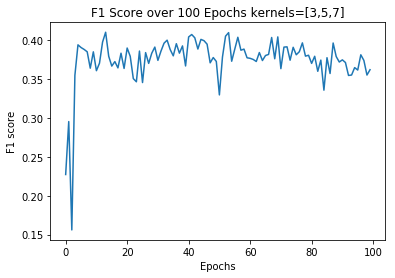

In [70]:
plt.plot(range(len(f1s)),f1s)
plt.title("F1 Score over 100 Epochs kernels=[3,5,7]")
plt.xlabel("Epochs")
plt.ylabel("F1 score")
plt.savefig("F1 Score over Epochs.png")

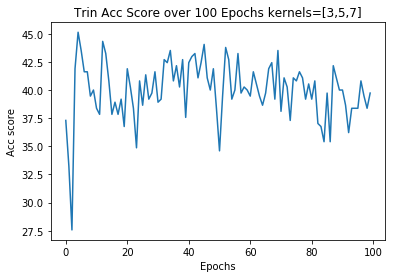

In [71]:
plt.plot(range(len(accs)),accs)
plt.title("Trin Acc Score over 100 Epochs kernels=[3,5,7]")
plt.xlabel("Epochs")
plt.ylabel("Acc score")
plt.savefig("Acc Score over Epochs.png")

In [85]:
## Save model
def saveBestModel(model,filepath):
    torch.save(model,filepath)
    # test 
#     m = torch.load(filepath)

## Experiment 2
CNN Text Classification at higher kernels
11,13,15

In [80]:
# class  CNNClassifier_two_layer(nn.Module):
    
#     def __init__(self, vocab_size, embedding_dim, output_size, kernel_dim=100, kernel_sizes=(2, 3, 4), dropout=0.5):
#         super(CNNClassifier,self).__init__()

#         self.embedding = nn.Embedding(vocab_size, embedding_dim)
#         self.convs = nn.ModuleList([nn.Conv2d(1, kernel_dim, (K, embedding_dim)) for K in kernel_sizes])

#         # kernal_size = (K,D) 
#         self.dropout = nn.Dropout(dropout)
#         # FC layer 1: 100 dim
#         self.fc = nn.Linear(len(kernel_sizes) * kernel_dim, kernel_dim)
#         # extra layer
#         self.final_layer = nn.Linear(kernel_dim, output_size)
    
    
#     def init_weights(self, pretrained_word_vectors, is_static=False):
#         self.embedding.weight = nn.Parameter(torch.from_numpy(pretrained_word_vectors).float())
#         if is_static:
#             self.embedding.weight.requires_grad = False


#     def forward(self, inputs, is_training=False):
#         inputs = self.embedding(inputs).unsqueeze(1) # (B,1,T,D)
#         inputs = [F.relu(conv(inputs)).squeeze(3) for conv in self.convs] #[(N,Co,W), ...]*len(Ks)
#         inputs = [F.max_pool1d(i, i.size(2)).squeeze(2) for i in inputs] #[(N,Co), ...]*len(Ks)

#         concated = torch.cat(inputs, 1)

#         if is_training:
#             concated = self.dropout(concated) # (N,len(Ks)*Co)
#         out = self.fc(concated) 
#         out2 = self.final_layer(out)
#         return F.log_softmax(out2)

In [81]:
EPOCH = 100
BATCH_SIZE = 2
KERNEL_SIZES = [13,15,17]
KERNEL_DIM = 100
LR = 0.001

model = CNNClassifier(len(word2index), 300, len(target2index), KERNEL_DIM, KERNEL_SIZES)
model.init_weights(pretrained_vectors) # initialize embedding matrix using pretrained vectors

if USE_CUDA:
    model = model.cuda()
    
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LR)

In [86]:
f1s= []
accs = []
best_model=0.0
for epoch in tqdm(range(EPOCH)):
    losses = []
    for i,batch in enumerate(getBatch(BATCH_SIZE, train_data)):
#         print(batch)
        inputs,targets = pad_to_batch(batch)
        
        model.zero_grad()
#         print(inputs.shape)
        preds = model(inputs, True)
        
        loss = loss_function(preds, targets)
#         print(loss.data[0])
        losses.append(loss.data[0])
        loss.backward()
        
        #for param in model.parameters():
        #    param.grad.data.clamp_(-3, 3)
        
        optimizer.step()
        
    if epoch%1==0:
        print("[%d/%d] mean_loss : %0.2f" %(epoch, EPOCH, np.mean(losses)))
        losses = []
        accs.append(acc())
        f1s.append(f1())
        print("Train Acc: ",accs[-1],"F1 score on Test Set",f1s[-1])
        if f1s[-1] > best_model:
            best_model = f1s[-1]
            saveBestModel(model,"models/Exp2/CNN_Exp2_f1_"+str(best_model)+"_acc_"+str(accs[-1]))


  0%|          | 0/100 [00:00<?, ?it/s]


[0/100] mean_loss : 1.71


/opt/conda/envs/pytorch-py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/pytorch-py35/lib/python3.5/site-packages/torch/serialization.py:155: UserWarning: Couldn't retrieve source code for container of type CNNClassifier. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
  1%|          | 1/100 [02:25<3:59:24, 145.09s/it]

Train Acc:  31.351351351351354 F1 score on Test Set 0.212281597097
[1/100] mean_loss : 1.54


  2%|▏         | 2/100 [04:49<3:56:45, 144.96s/it]

Train Acc:  37.567567567567565 F1 score on Test Set 0.307873109093
[2/100] mean_loss : 1.34


  3%|▎         | 3/100 [07:14<3:54:01, 144.76s/it]

Train Acc:  38.91891891891892 F1 score on Test Set 0.241307439569
[3/100] mean_loss : 1.12


  4%|▍         | 4/100 [09:38<3:51:21, 144.60s/it]

Train Acc:  35.4054054054054 F1 score on Test Set 0.287371164145
[4/100] mean_loss : 0.92


  5%|▌         | 5/100 [12:02<3:48:38, 144.41s/it]

Train Acc:  41.08108108108108 F1 score on Test Set 0.357511032618
[5/100] mean_loss : 0.72


  6%|▌         | 6/100 [14:26<3:46:16, 144.43s/it]

Train Acc:  41.62162162162162 F1 score on Test Set 0.348244747359
[6/100] mean_loss : 0.59


  7%|▋         | 7/100 [16:52<3:44:23, 144.77s/it]

Train Acc:  36.75675675675676 F1 score on Test Set 0.348216442085
[7/100] mean_loss : 0.55


  8%|▊         | 8/100 [19:17<3:41:58, 144.77s/it]

Train Acc:  41.891891891891895 F1 score on Test Set 0.361805689427
[8/100] mean_loss : 0.50


  9%|▉         | 9/100 [21:42<3:39:49, 144.94s/it]

Train Acc:  34.32432432432432 F1 score on Test Set 0.328885149603
[9/100] mean_loss : 0.41


 10%|█         | 10/100 [24:07<3:37:16, 144.85s/it]

Train Acc:  38.108108108108105 F1 score on Test Set 0.351990156903
[10/100] mean_loss : 0.31


 11%|█         | 11/100 [26:31<3:34:47, 144.80s/it]

Train Acc:  39.729729729729726 F1 score on Test Set 0.348992565209
[11/100] mean_loss : 0.36


 12%|█▏        | 12/100 [28:57<3:32:41, 145.01s/it]

Train Acc:  42.7027027027027 F1 score on Test Set 0.374132814352
[12/100] mean_loss : 0.34


 13%|█▎        | 13/100 [31:22<3:30:15, 145.01s/it]

Train Acc:  40.27027027027027 F1 score on Test Set 0.364786993392
[13/100] mean_loss : 0.27


 14%|█▍        | 14/100 [33:47<3:27:57, 145.09s/it]

Train Acc:  35.945945945945944 F1 score on Test Set 0.332871424565
[14/100] mean_loss : 0.26


 15%|█▌        | 15/100 [36:12<3:25:40, 145.19s/it]

Train Acc:  39.189189189189186 F1 score on Test Set 0.355334363392
[15/100] mean_loss : 0.23


 16%|█▌        | 16/100 [38:37<3:23:04, 145.05s/it]

Train Acc:  38.648648648648646 F1 score on Test Set 0.347602876196
[16/100] mean_loss : 0.22


 17%|█▋        | 17/100 [41:04<3:21:27, 145.63s/it]

Train Acc:  35.945945945945944 F1 score on Test Set 0.326566090127
[17/100] mean_loss : 0.21


 18%|█▊        | 18/100 [43:30<3:19:10, 145.74s/it]

Train Acc:  44.054054054054056 F1 score on Test Set 0.391258011763
[18/100] mean_loss : 0.24


 19%|█▉        | 19/100 [45:55<3:16:35, 145.62s/it]

Train Acc:  37.567567567567565 F1 score on Test Set 0.361374086553
[19/100] mean_loss : 0.30


 20%|██        | 20/100 [48:19<3:13:31, 145.15s/it]

Train Acc:  37.2972972972973 F1 score on Test Set 0.361048477823
[20/100] mean_loss : 0.22


 21%|██        | 21/100 [50:44<3:11:01, 145.08s/it]

Train Acc:  37.027027027027025 F1 score on Test Set 0.336445274508
[21/100] mean_loss : 0.20


 22%|██▏       | 22/100 [53:11<3:09:04, 145.45s/it]

Train Acc:  38.37837837837838 F1 score on Test Set 0.368718325297
[22/100] mean_loss : 0.21


 23%|██▎       | 23/100 [55:36<3:06:43, 145.50s/it]

Train Acc:  39.189189189189186 F1 score on Test Set 0.359176124966
[23/100] mean_loss : 0.18


 24%|██▍       | 24/100 [58:01<3:04:08, 145.38s/it]

Train Acc:  40.81081081081081 F1 score on Test Set 0.374614666067
[24/100] mean_loss : 0.19


 25%|██▌       | 25/100 [1:00:27<3:01:38, 145.31s/it]

Train Acc:  40.27027027027027 F1 score on Test Set 0.360112057488
[25/100] mean_loss : 0.20


 26%|██▌       | 26/100 [1:02:51<2:59:00, 145.14s/it]

Train Acc:  40.81081081081081 F1 score on Test Set 0.368702374165
[26/100] mean_loss : 0.20


 27%|██▋       | 27/100 [1:05:17<2:56:53, 145.40s/it]

Train Acc:  39.729729729729726 F1 score on Test Set 0.364344971043
[27/100] mean_loss : 0.20


 28%|██▊       | 28/100 [1:07:43<2:54:30, 145.42s/it]

Train Acc:  44.5945945945946 F1 score on Test Set 0.406939002226
[28/100] mean_loss : 0.21


 29%|██▉       | 29/100 [1:10:07<2:51:43, 145.12s/it]

Train Acc:  42.7027027027027 F1 score on Test Set 0.383834437935
[29/100] mean_loss : 0.22


 30%|███       | 30/100 [1:12:33<2:49:23, 145.20s/it]

Train Acc:  38.91891891891892 F1 score on Test Set 0.361628884287
[30/100] mean_loss : 0.17


/opt/conda/envs/pytorch-py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
 31%|███       | 31/100 [1:14:58<2:46:54, 145.14s/it]

Train Acc:  38.648648648648646 F1 score on Test Set 0.362969681169
[31/100] mean_loss : 0.17


 32%|███▏      | 32/100 [1:17:22<2:44:16, 144.94s/it]

Train Acc:  39.45945945945946 F1 score on Test Set 0.364660872344
[32/100] mean_loss : 0.16


 33%|███▎      | 33/100 [1:19:48<2:42:06, 145.17s/it]

Train Acc:  39.189189189189186 F1 score on Test Set 0.372318128324
[33/100] mean_loss : 0.14


 34%|███▍      | 34/100 [1:22:13<2:39:44, 145.22s/it]

Train Acc:  40.54054054054054 F1 score on Test Set 0.358736091152
[34/100] mean_loss : 0.12


 35%|███▌      | 35/100 [1:24:39<2:37:38, 145.51s/it]

Train Acc:  37.2972972972973 F1 score on Test Set 0.364004830343
[35/100] mean_loss : 0.10


 36%|███▌      | 36/100 [1:27:04<2:34:47, 145.12s/it]

Train Acc:  38.648648648648646 F1 score on Test Set 0.378324750142
[36/100] mean_loss : 0.17


 37%|███▋      | 37/100 [1:29:28<2:32:16, 145.03s/it]

Train Acc:  40.54054054054054 F1 score on Test Set 0.367061923952
[37/100] mean_loss : 0.18


 38%|███▊      | 38/100 [1:31:54<2:29:54, 145.08s/it]

Train Acc:  38.108108108108105 F1 score on Test Set 0.340721696626
[38/100] mean_loss : 0.12


 39%|███▉      | 39/100 [1:34:19<2:27:28, 145.06s/it]

Train Acc:  36.486486486486484 F1 score on Test Set 0.345588105195
[39/100] mean_loss : 0.16


 40%|████      | 40/100 [1:36:43<2:24:58, 144.97s/it]

Train Acc:  39.729729729729726 F1 score on Test Set 0.362529074529
[40/100] mean_loss : 0.14


 41%|████      | 41/100 [1:39:09<2:22:46, 145.19s/it]

Train Acc:  38.648648648648646 F1 score on Test Set 0.349643081817
[41/100] mean_loss : 0.14


 42%|████▏     | 42/100 [1:41:35<2:20:41, 145.54s/it]

Train Acc:  37.2972972972973 F1 score on Test Set 0.350213627427
[42/100] mean_loss : 0.13


 43%|████▎     | 43/100 [1:44:02<2:18:30, 145.79s/it]

Train Acc:  39.189189189189186 F1 score on Test Set 0.343251752924
[43/100] mean_loss : 0.13


 44%|████▍     | 44/100 [1:46:27<2:15:52, 145.57s/it]

Train Acc:  40.81081081081081 F1 score on Test Set 0.367470470275
[44/100] mean_loss : 0.14


 45%|████▌     | 45/100 [1:48:53<2:13:40, 145.83s/it]

Train Acc:  36.75675675675676 F1 score on Test Set 0.353082869974
[45/100] mean_loss : 0.14


 46%|████▌     | 46/100 [1:51:18<2:11:00, 145.56s/it]

Train Acc:  39.729729729729726 F1 score on Test Set 0.351023944969
[46/100] mean_loss : 0.12


 47%|████▋     | 47/100 [1:53:43<2:08:22, 145.32s/it]

Train Acc:  41.08108108108108 F1 score on Test Set 0.353409463391
[47/100] mean_loss : 0.21


 48%|████▊     | 48/100 [1:56:08<2:05:48, 145.16s/it]

Train Acc:  40.54054054054054 F1 score on Test Set 0.373812614836
[48/100] mean_loss : 0.12


 49%|████▉     | 49/100 [1:58:33<2:03:29, 145.28s/it]

Train Acc:  38.648648648648646 F1 score on Test Set 0.349257990768
[49/100] mean_loss : 0.10


 50%|█████     | 50/100 [2:00:59<2:01:15, 145.51s/it]

Train Acc:  39.189189189189186 F1 score on Test Set 0.373964451807
[50/100] mean_loss : 0.10


 51%|█████     | 51/100 [2:03:25<1:58:52, 145.55s/it]

Train Acc:  39.45945945945946 F1 score on Test Set 0.369722046975
[51/100] mean_loss : 0.17


 52%|█████▏    | 52/100 [2:05:50<1:56:17, 145.37s/it]

Train Acc:  38.91891891891892 F1 score on Test Set 0.357120446234
[52/100] mean_loss : 0.10


 53%|█████▎    | 53/100 [2:08:15<1:53:46, 145.25s/it]

Train Acc:  41.62162162162162 F1 score on Test Set 0.381043975759
[53/100] mean_loss : 0.09


 54%|█████▍    | 54/100 [2:10:41<1:51:38, 145.63s/it]

Train Acc:  42.16216216216216 F1 score on Test Set 0.375827475827
[54/100] mean_loss : 0.12


 55%|█████▌    | 55/100 [2:13:07<1:49:18, 145.75s/it]

Train Acc:  40.27027027027027 F1 score on Test Set 0.372237833966
[55/100] mean_loss : 0.15


 56%|█████▌    | 56/100 [2:15:33<1:46:57, 145.84s/it]

Train Acc:  43.513513513513516 F1 score on Test Set 0.40349429877
[56/100] mean_loss : 0.15


 57%|█████▋    | 57/100 [2:17:59<1:44:33, 145.89s/it]

Train Acc:  37.83783783783784 F1 score on Test Set 0.340617684635
[57/100] mean_loss : 0.15


 58%|█████▊    | 58/100 [2:20:25<1:42:08, 145.92s/it]

Train Acc:  35.4054054054054 F1 score on Test Set 0.35033255582
[58/100] mean_loss : 0.09


 59%|█████▉    | 59/100 [2:22:50<1:39:28, 145.56s/it]

Train Acc:  40.0 F1 score on Test Set 0.36827945636
[59/100] mean_loss : 0.15


 60%|██████    | 60/100 [2:25:15<1:36:54, 145.36s/it]

Train Acc:  42.432432432432435 F1 score on Test Set 0.388152043212
[60/100] mean_loss : 0.16


 61%|██████    | 61/100 [2:27:41<1:34:30, 145.39s/it]

Train Acc:  39.729729729729726 F1 score on Test Set 0.373067771163
[61/100] mean_loss : 0.13


 62%|██████▏   | 62/100 [2:30:06<1:32:06, 145.43s/it]

Train Acc:  38.648648648648646 F1 score on Test Set 0.351191921815
[62/100] mean_loss : 0.14


 63%|██████▎   | 63/100 [2:32:30<1:29:29, 145.11s/it]

Train Acc:  39.189189189189186 F1 score on Test Set 0.359019485631
[63/100] mean_loss : 0.09


 64%|██████▍   | 64/100 [2:34:57<1:27:15, 145.42s/it]

Train Acc:  39.729729729729726 F1 score on Test Set 0.367956300456
[64/100] mean_loss : 0.09


 65%|██████▌   | 65/100 [2:37:22<1:24:48, 145.38s/it]

Train Acc:  39.189189189189186 F1 score on Test Set 0.377720250886
[65/100] mean_loss : 0.07


 66%|██████▌   | 66/100 [2:39:47<1:22:20, 145.30s/it]

Train Acc:  42.16216216216216 F1 score on Test Set 0.368956006383
[66/100] mean_loss : 0.12


 67%|██████▋   | 67/100 [2:42:13<1:20:02, 145.54s/it]

Train Acc:  40.81081081081081 F1 score on Test Set 0.359700752987
[67/100] mean_loss : 0.11


 68%|██████▊   | 68/100 [2:44:39<1:17:36, 145.51s/it]

Train Acc:  35.945945945945944 F1 score on Test Set 0.351282906966
[68/100] mean_loss : 0.10


 69%|██████▉   | 69/100 [2:47:04<1:15:07, 145.42s/it]

Train Acc:  40.27027027027027 F1 score on Test Set 0.375887234567
[69/100] mean_loss : 0.13


 70%|███████   | 70/100 [2:49:29<1:12:40, 145.35s/it]

Train Acc:  41.08108108108108 F1 score on Test Set 0.393827251192
[70/100] mean_loss : 0.11


 71%|███████   | 71/100 [2:51:54<1:10:15, 145.37s/it]

Train Acc:  37.83783783783784 F1 score on Test Set 0.352038045636
[71/100] mean_loss : 0.10


 72%|███████▏  | 72/100 [2:54:20<1:07:52, 145.43s/it]

Train Acc:  41.08108108108108 F1 score on Test Set 0.359126660871
[72/100] mean_loss : 0.11


 73%|███████▎  | 73/100 [2:56:46<1:05:34, 145.71s/it]

Train Acc:  40.0 F1 score on Test Set 0.37796034008
[73/100] mean_loss : 0.16


 74%|███████▍  | 74/100 [2:59:13<1:03:14, 145.93s/it]

Train Acc:  38.108108108108105 F1 score on Test Set 0.357459491338
[74/100] mean_loss : 0.11


 75%|███████▌  | 75/100 [3:01:39<1:00:52, 146.12s/it]

Train Acc:  38.91891891891892 F1 score on Test Set 0.363376003951
[75/100] mean_loss : 0.11


 76%|███████▌  | 76/100 [3:04:05<58:23, 145.96s/it]  

Train Acc:  35.4054054054054 F1 score on Test Set 0.338025943538
[76/100] mean_loss : 0.11


 77%|███████▋  | 77/100 [3:06:29<55:44, 145.40s/it]

Train Acc:  40.54054054054054 F1 score on Test Set 0.364496496163
[77/100] mean_loss : 0.09


 78%|███████▊  | 78/100 [3:08:54<53:18, 145.38s/it]

Train Acc:  37.567567567567565 F1 score on Test Set 0.376716398541
[78/100] mean_loss : 0.11


 79%|███████▉  | 79/100 [3:11:20<50:55, 145.49s/it]

Train Acc:  37.2972972972973 F1 score on Test Set 0.359477878759
[79/100] mean_loss : 0.13


 80%|████████  | 80/100 [3:13:46<48:34, 145.72s/it]

Train Acc:  35.4054054054054 F1 score on Test Set 0.33859403454
[80/100] mean_loss : 0.11


 81%|████████  | 81/100 [3:16:12<46:06, 145.60s/it]

Train Acc:  43.24324324324324 F1 score on Test Set 0.394261371243
[81/100] mean_loss : 0.06


 82%|████████▏ | 82/100 [3:18:38<43:42, 145.69s/it]

Train Acc:  41.62162162162162 F1 score on Test Set 0.376406157484
[82/100] mean_loss : 0.11


 83%|████████▎ | 83/100 [3:21:03<41:15, 145.61s/it]

Train Acc:  39.189189189189186 F1 score on Test Set 0.388237241099
[83/100] mean_loss : 0.10


 84%|████████▍ | 84/100 [3:23:29<38:50, 145.63s/it]

Train Acc:  41.891891891891895 F1 score on Test Set 0.375898012997
[84/100] mean_loss : 0.11


 85%|████████▌ | 85/100 [3:25:55<36:25, 145.72s/it]

Train Acc:  40.81081081081081 F1 score on Test Set 0.385367902118
[85/100] mean_loss : 0.13


 86%|████████▌ | 86/100 [3:28:20<33:57, 145.54s/it]

Train Acc:  36.75675675675676 F1 score on Test Set 0.367111400875
[86/100] mean_loss : 0.11


 87%|████████▋ | 87/100 [3:30:45<31:32, 145.56s/it]

Train Acc:  41.08108108108108 F1 score on Test Set 0.393713530638
[87/100] mean_loss : 0.08


 88%|████████▊ | 88/100 [3:33:10<29:05, 145.44s/it]

Train Acc:  42.16216216216216 F1 score on Test Set 0.380099073616
[88/100] mean_loss : 0.12


 89%|████████▉ | 89/100 [3:35:36<26:41, 145.56s/it]

Train Acc:  38.108108108108105 F1 score on Test Set 0.36550404201
[89/100] mean_loss : 0.16


 90%|█████████ | 90/100 [3:38:01<24:14, 145.43s/it]

Train Acc:  40.27027027027027 F1 score on Test Set 0.377720235498
[90/100] mean_loss : 0.09


 91%|█████████ | 91/100 [3:40:27<21:49, 145.47s/it]

Train Acc:  40.81081081081081 F1 score on Test Set 0.388289531729
[91/100] mean_loss : 0.08


 92%|█████████▏| 92/100 [3:42:52<19:23, 145.48s/it]

Train Acc:  37.2972972972973 F1 score on Test Set 0.358649844128
[92/100] mean_loss : 0.09


 93%|█████████▎| 93/100 [3:45:18<16:57, 145.35s/it]

Train Acc:  38.108108108108105 F1 score on Test Set 0.35231628886
[93/100] mean_loss : 0.07


 94%|█████████▍| 94/100 [3:47:43<14:32, 145.48s/it]

Train Acc:  41.351351351351354 F1 score on Test Set 0.360230761899
[94/100] mean_loss : 0.11


 95%|█████████▌| 95/100 [3:50:10<12:08, 145.78s/it]

Train Acc:  41.351351351351354 F1 score on Test Set 0.363104315117
[95/100] mean_loss : 0.08


 96%|█████████▌| 96/100 [3:52:35<09:42, 145.66s/it]

Train Acc:  38.108108108108105 F1 score on Test Set 0.352443135971
[96/100] mean_loss : 0.10


 97%|█████████▋| 97/100 [3:55:01<07:16, 145.61s/it]

Train Acc:  39.45945945945946 F1 score on Test Set 0.364914664232
[97/100] mean_loss : 0.08


 98%|█████████▊| 98/100 [3:57:26<04:50, 145.50s/it]

Train Acc:  37.027027027027025 F1 score on Test Set 0.360688045365
[98/100] mean_loss : 0.16


 99%|█████████▉| 99/100 [3:59:51<02:25, 145.52s/it]

Train Acc:  38.648648648648646 F1 score on Test Set 0.364912157438
[99/100] mean_loss : 0.09


100%|██████████| 100/100 [4:02:18<00:00, 145.88s/it]

Train Acc:  37.83783783783784 F1 score on Test Set 0.372928215856


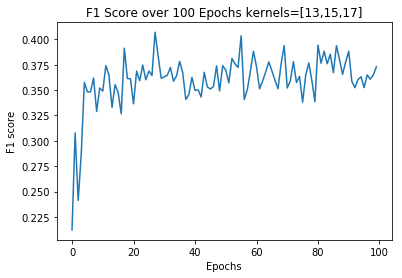

In [87]:
plt.plot(range(len(f1s)),f1s)
plt.title("F1 Score over 100 Epochs kernels=[13,15,17]")
plt.xlabel("Epochs")
plt.ylabel("F1 score")
plt.savefig("F1 Score over Epochs.png")

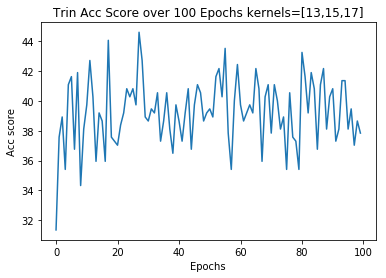

In [88]:
plt.plot(range(len(accs)),accs)
plt.title("Trin Acc Score over 100 Epochs kernels=[13,15,17]")
plt.xlabel("Epochs")
plt.ylabel("Acc score")
plt.savefig("Acc Score over Epochs.png")

In [ ]:
## Experiment 3:
Increase Capacity

In [90]:
EPOCH = 100
BATCH_SIZE = 2
KERNEL_SIZES = [5,7,9]
KERNEL_DIM = 200
LR = 0.001

model = CNNClassifier(len(word2index), 300, len(target2index), KERNEL_DIM, KERNEL_SIZES)
model.init_weights(pretrained_vectors) # initialize embedding matrix using pretrained vectors

if USE_CUDA:
    model = model.cuda()
    
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LR)

In [ ]:
f1s= []
accs = []
best_model=0.0
for epoch in tqdm(range(EPOCH)):
    losses = []
    for i,batch in enumerate(getBatch(BATCH_SIZE, train_data)):
#         print(batch)
        inputs,targets = pad_to_batch(batch)
        
        model.zero_grad()
#         print(inputs.shape)
        preds = model(inputs, True)
        
        loss = loss_function(preds, targets)
#         print(loss.data[0])
        losses.append(loss.data[0])
        loss.backward()
        
        #for param in model.parameters():
        #    param.grad.data.clamp_(-3, 3)
        
        optimizer.step()
        
    if epoch%1==0:
        print("[%d/%d] mean_loss : %0.2f" %(epoch, EPOCH, np.mean(losses)))
        losses = []
        accs.append(acc())
        f1s.append(f1())
        print("Train Acc: ",accs[-1],"F1 score on Test Set",f1s[-1])
        if f1s[-1] > best_model:
            best_model = f1s[-1]
            saveBestModel(model,"models/Exp3/CNN_Exp3_f1_"+str(best_model)+"_acc_"+str(accs[-1]))

  0%|          | 0/100 [00:00<?, ?it/s]

[0/100] mean_loss : 4.37


/opt/conda/envs/pytorch-py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/pytorch-py35/lib/python3.5/site-packages/torch/serialization.py:155: UserWarning: Couldn't retrieve source code for container of type CNNClassifier. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
  1%|          | 1/100 [02:05<3:26:39, 125.25s/it]

Train Acc:  26.756756756756754 F1 score on Test Set 0.114177539609
[1/100] mean_loss : 2.14
Train Acc:  31.08108108108108 F1 score on Test Set 0.212996357162


  2%|▏         | 2/100 [04:13<3:25:50, 126.03s/it]

[2/100] mean_loss : 1.78


  3%|▎         | 3/100 [06:21<3:24:48, 126.68s/it]

Train Acc:  41.08108108108108 F1 score on Test Set 0.33332918948
[3/100] mean_loss : 1.57


  4%|▍         | 4/100 [08:29<3:23:26, 127.15s/it]

Train Acc:  40.54054054054054 F1 score on Test Set 0.346127339098
[4/100] mean_loss : 1.21


  5%|▌         | 5/100 [10:37<3:21:29, 127.26s/it]

Train Acc:  42.7027027027027 F1 score on Test Set 0.338437508433
[5/100] mean_loss : 0.78


  6%|▌         | 6/100 [12:44<3:19:40, 127.45s/it]

Train Acc:  40.27027027027027 F1 score on Test Set 0.376716413664
[6/100] mean_loss : 0.55


  7%|▋         | 7/100 [14:53<3:17:50, 127.64s/it]

Train Acc:  43.24324324324324 F1 score on Test Set 0.391582989633
[7/100] mean_loss : 0.36


  8%|▊         | 8/100 [17:01<3:16:01, 127.85s/it]

Train Acc:  42.972972972972975 F1 score on Test Set 0.372343925502
[8/100] mean_loss : 0.21


  9%|▉         | 9/100 [19:11<3:14:45, 128.41s/it]

Train Acc:  42.432432432432435 F1 score on Test Set 0.370053587355
[9/100] mean_loss : 0.24


 10%|█         | 10/100 [21:19<3:12:37, 128.42s/it]

Train Acc:  44.5945945945946 F1 score on Test Set 0.388497694456
[10/100] mean_loss : 0.25


 11%|█         | 11/100 [23:28<3:10:56, 128.72s/it]

Train Acc:  40.27027027027027 F1 score on Test Set 0.362066176391
[11/100] mean_loss : 0.24


/opt/conda/envs/pytorch-py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
 12%|█▏        | 12/100 [25:38<3:09:11, 128.99s/it]

Train Acc:  39.729729729729726 F1 score on Test Set 0.386141212472
[12/100] mean_loss : 0.19


 13%|█▎        | 13/100 [27:48<3:07:18, 129.17s/it]

Train Acc:  43.24324324324324 F1 score on Test Set 0.393096628656
[13/100] mean_loss : 0.12


 14%|█▍        | 14/100 [29:58<3:05:27, 129.40s/it]

Train Acc:  37.83783783783784 F1 score on Test Set 0.37403141267
[14/100] mean_loss : 0.10


 15%|█▌        | 15/100 [32:08<3:03:45, 129.71s/it]

Train Acc:  39.45945945945946 F1 score on Test Set 0.375717095071
[15/100] mean_loss : 0.09


 16%|█▌        | 16/100 [34:18<3:01:37, 129.73s/it]

Train Acc:  40.81081081081081 F1 score on Test Set 0.386579968224
[16/100] mean_loss : 0.12


 17%|█▋        | 17/100 [36:27<2:59:16, 129.60s/it]

Train Acc:  43.78378378378379 F1 score on Test Set 0.389096400258
[17/100] mean_loss : 0.13


 18%|█▊        | 18/100 [38:37<2:57:25, 129.83s/it]

Train Acc:  37.83783783783784 F1 score on Test Set 0.350279912019
[18/100] mean_loss : 0.14


 19%|█▉        | 19/100 [40:47<2:55:18, 129.86s/it]

Train Acc:  41.351351351351354 F1 score on Test Set 0.397994690173
[19/100] mean_loss : 0.12


 20%|██        | 20/100 [42:58<2:53:31, 130.15s/it]

Train Acc:  40.27027027027027 F1 score on Test Set 0.348016968531
[20/100] mean_loss : 0.07


 21%|██        | 21/100 [45:08<2:51:21, 130.15s/it]

Train Acc:  40.27027027027027 F1 score on Test Set 0.373674515514
[21/100] mean_loss : 0.08


 22%|██▏       | 22/100 [47:18<2:48:48, 129.85s/it]

Train Acc:  39.189189189189186 F1 score on Test Set 0.361587079074
[22/100] mean_loss : 0.10


 23%|██▎       | 23/100 [49:26<2:46:15, 129.56s/it]

Train Acc:  42.972972972972975 F1 score on Test Set 0.384399955211
[23/100] mean_loss : 0.10


 24%|██▍       | 24/100 [51:34<2:43:29, 129.07s/it]

Train Acc:  42.972972972972975 F1 score on Test Set 0.36611363918
[24/100] mean_loss : 0.11


 25%|██▌       | 25/100 [53:43<2:41:19, 129.06s/it]

Train Acc:  38.37837837837838 F1 score on Test Set 0.355382835016
[25/100] mean_loss : 0.12


 26%|██▌       | 26/100 [55:52<2:38:53, 128.84s/it]

Train Acc:  42.16216216216216 F1 score on Test Set 0.385093284867
[26/100] mean_loss : 0.06


 27%|██▋       | 27/100 [58:01<2:36:52, 128.94s/it]

Train Acc:  41.08108108108108 F1 score on Test Set 0.356741237687
[27/100] mean_loss : 0.08


 28%|██▊       | 28/100 [1:00:09<2:34:21, 128.64s/it]

Train Acc:  38.108108108108105 F1 score on Test Set 0.354299874581
[28/100] mean_loss : 0.06


 29%|██▉       | 29/100 [1:02:18<2:32:30, 128.88s/it]

Train Acc:  37.2972972972973 F1 score on Test Set 0.344944628161
[29/100] mean_loss : 0.11


 30%|███       | 30/100 [1:04:27<2:30:25, 128.94s/it]

Train Acc:  40.81081081081081 F1 score on Test Set 0.367750993674
[30/100] mean_loss : 0.06


 31%|███       | 31/100 [1:06:37<2:28:31, 129.15s/it]

Train Acc:  41.891891891891895 F1 score on Test Set 0.379390318414
[31/100] mean_loss : 0.06


 32%|███▏      | 32/100 [1:08:48<2:27:00, 129.71s/it]

Train Acc:  38.108108108108105 F1 score on Test Set 0.369153665809


In [ ]:
plt.plot(range(len(f1s)),f1s)
plt.title("F1 Score over 100 Epochs kernels=[5,7,9], Kernel Dim 200")
plt.xlabel("Epochs")
plt.ylabel("F1 score")
plt.savefig("F1 Score over Epochs.png")

In [ ]:
plt.plot(range(len(accs)),accs)
plt.title("Trin Acc Score over 100 Epochs kernels=[5,7,9], Kernel Dim 200")
plt.xlabel("Epochs")
plt.ylabel("Acc score")
plt.savefig("Acc Score over Epochs.png")